In [26]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv(os.path.join('data', 'train.csv'), index_col=0)
df['Deck'] = df['Cabin'].dropna().str[0]
df.loc[(df['Deck']=='T'), 'Deck'] = np.nan

encs = {}
for col in ['Sex', 'Embarked', 'Deck']:
    encs[col] = LabelEncoder()
    df.loc[pd.isnull(df[col]), col]  = 'NaN'
    df[col] = encs[col].fit_transform(df[col])
    print(col, encs[col].classes_)

Sex ['female' 'male']
Embarked ['C' 'NaN' 'Q' 'S']
Deck ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'NaN']


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int32  
 11  Deck      891 non-null    int32  
 12  title     891 non-null    object 
 13  Title     891 non-null    object 
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 134.0+ KB


In [30]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.343434,5.945006
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.167398,2.061500
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000,7.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000,7.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000,7.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,7.000000


In [31]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.174963,-0.294804
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.197493,0.743251
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.106395,0.118282
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.039280,-0.267987
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.068043,0.041333
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.032517,-0.031308
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.246359,-0.525994
Embarked,-0.174963,0.197493,0.106395,-0.039280,0.068043,0.032517,-0.246359,1.000000,0.227292
Deck,-0.294804,0.743251,0.118282,-0.267987,0.041333,-0.031308,-0.525994,0.227292,1.000000


C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


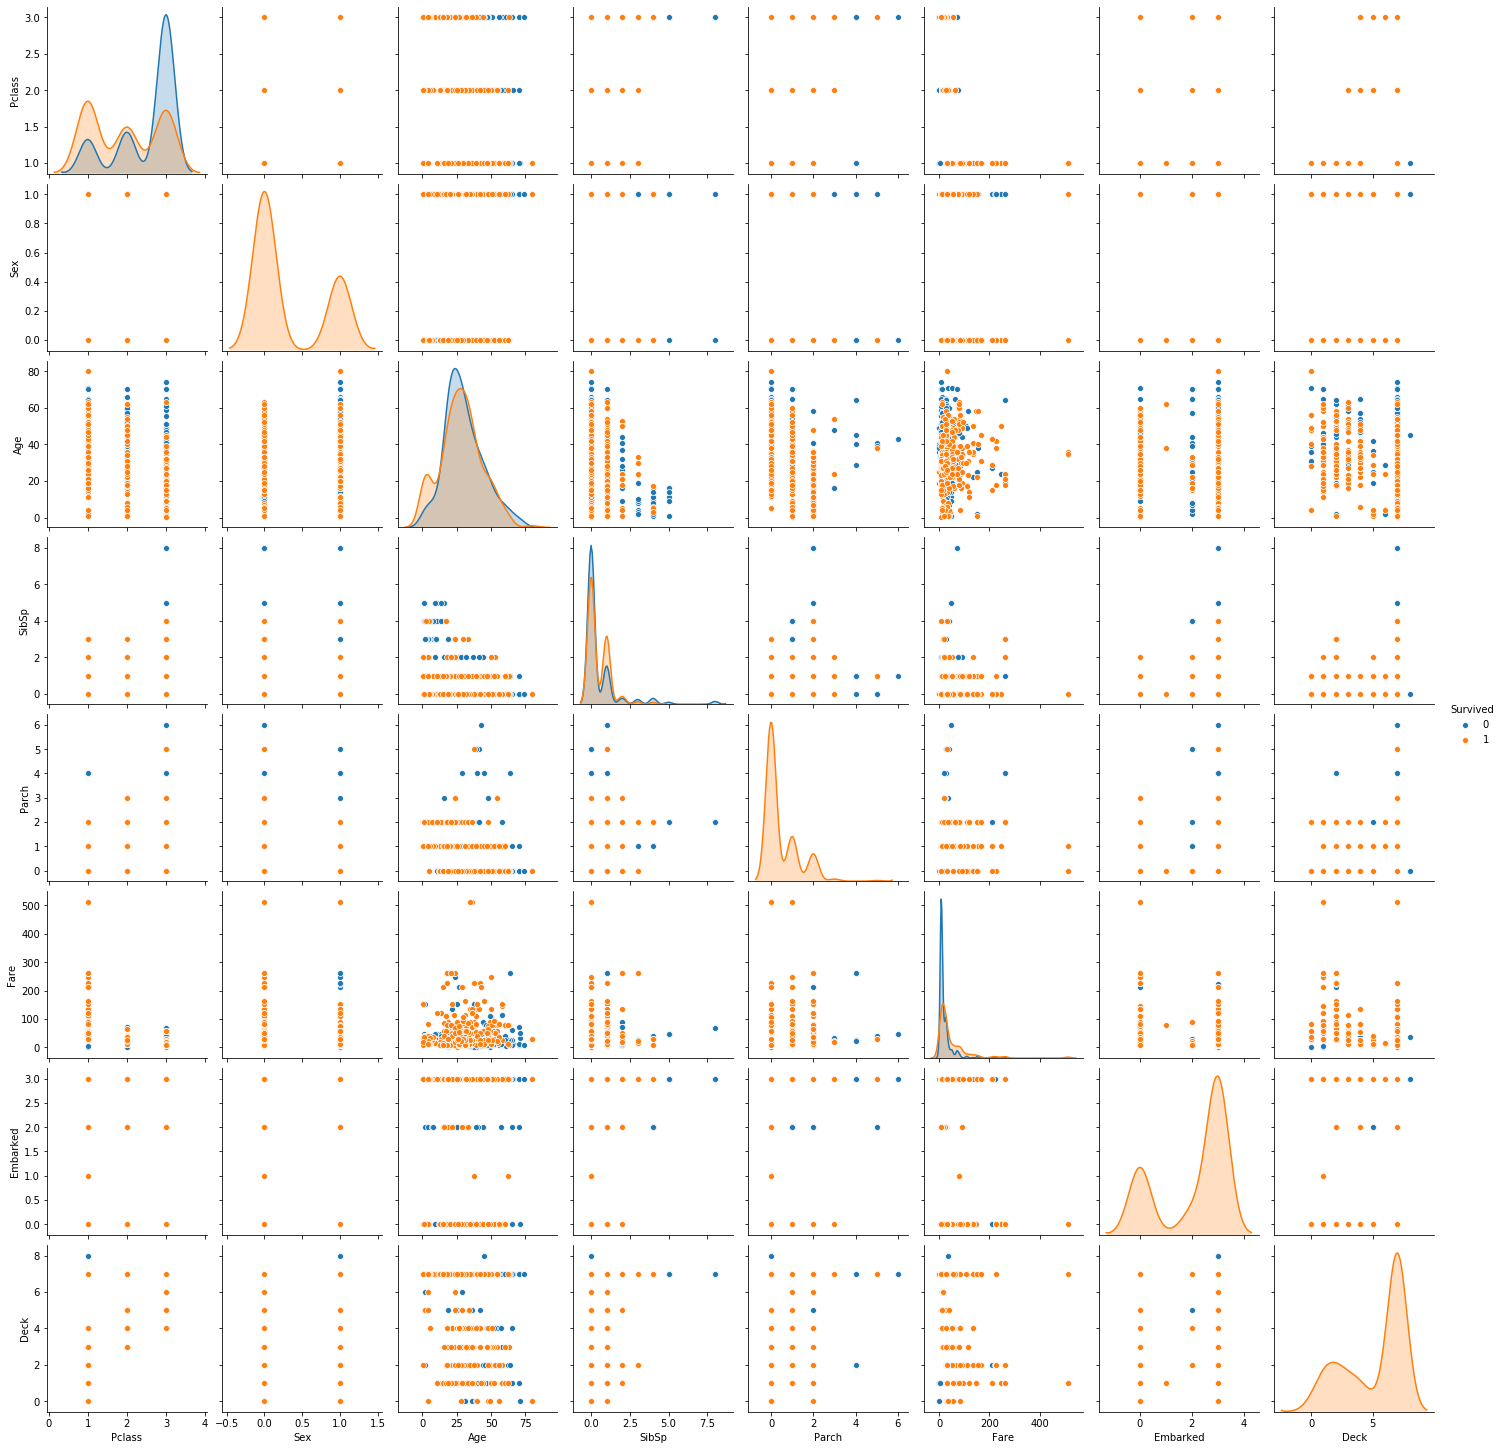

In [6]:
sns.pairplot(df, hue='Survived')

7    688
2     59
1     47
3     33
4     32
0     15
5     13
6      4
Name: Deck, dtype: int64

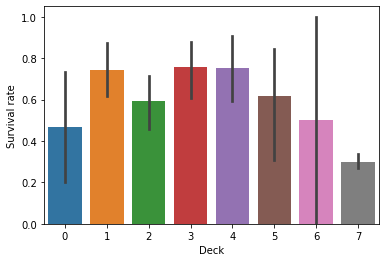

In [33]:
sns.barplot(x='Deck', y='Survived', data=df).set_ylabel('Survival rate')
# Survival rate seem to be very high for almost all decks (0 is A, 6 is G, 7 is nan)
# Maybe deck is known mostly by interviewing survivors, so by there being a deck is good sign (except lowest)
# Should create categories Known and Unknown for cabin instead
df['Deck'].value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,3,7
264,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0,B94,3,1
272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,3,7
278,0,2,"Parkes, Mr. Francis ""Frank""",1,NaN,0,0,239853,0.0,NaN,3,7
303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,3,7
414,0,2,"Cunningham, Mr. Alfred Fleming",1,NaN,0,0,239853,0.0,NaN,3,7
467,0,2,"Campbell, Mr. William",1,NaN,0,0,239853,0.0,NaN,3,7
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,0,0,239854,0.0,NaN,3,7
598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,3,7


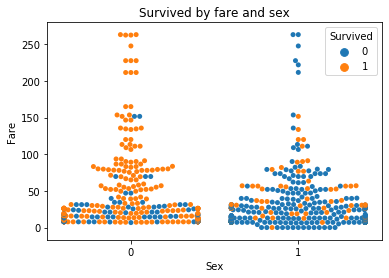

In [11]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df.loc[df['Fare']<500]).set_title('Survived by fare and sex')
df[df['Fare'] == 0]

Text(0, 0.5, 'Survival rate')

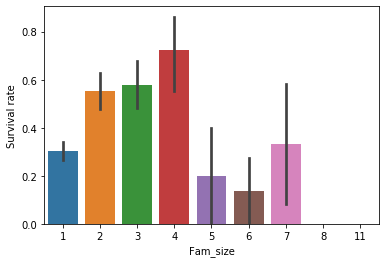

In [18]:
df['Fam_size'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='Fam_size', y='Survived', data=df).set_ylabel('Survival rate')

Text(0, 0.5, 'Survival rate')

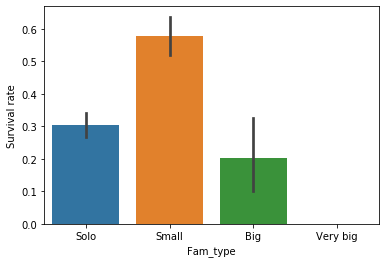

In [19]:
df['Fam_type'] = pd.cut(df['Fam_size'], [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
sns.barplot(x='Fam_type', y='Survived', data=df).set_ylabel('Survival rate')

In [48]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Lady              1
the Countess      1
Capt              1
Don               1
Mme               1
Ms                1
Sir               1
Name: Title, dtype: int64

In [50]:
# Substitute rare female titles
df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
df['Title'].value_counts()

Mr        525
Miss      188
Mrs       125
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

Text(0, 0.5, 'Survival rate')

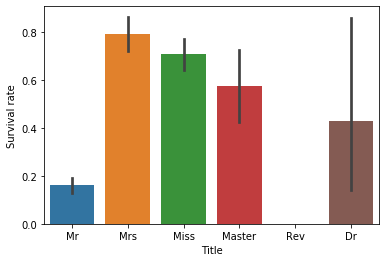

In [51]:
sns.barplot(x='Title', y='Survived', data=df).set_ylabel('Survival rate')